In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
advertising = pd.read_csv("/content/advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Data Inspection

In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Data Cleaning

In [6]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

,0
TV,0.0
Radio,0.0
Newspaper,0.0
Sales,0.0


No Null values Found

Exploratory Data Analysis

Univariate Analysis¶


Sales (Target Variable)

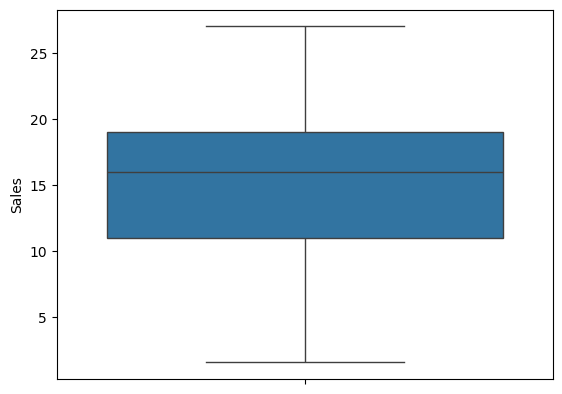

In [7]:
sns.boxplot(advertising['Sales'])
plt.show()

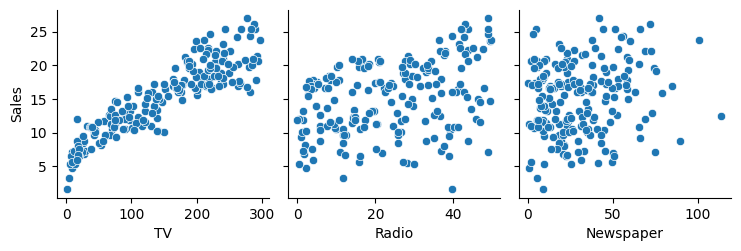

In [32]:
sns.pairplot(advertising, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()


Pair Plot Observation

When Advertising cost increases in TV Ads the sales will increase as well. While for the newspaper & Radio it is unpredictable.

<Axes: ylabel='Frequency'>

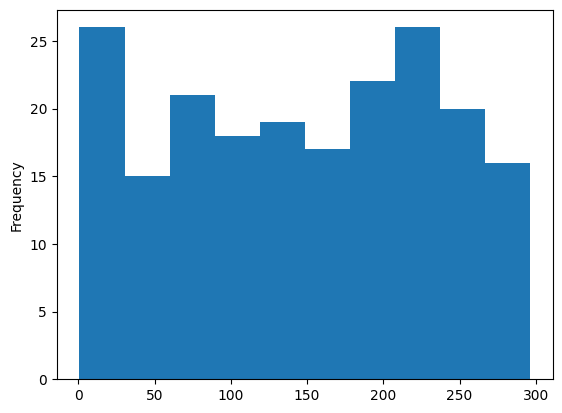

In [33]:
advertising['TV'].plot.hist(bins=10)


<Axes: xlabel='Radio', ylabel='Frequency'>

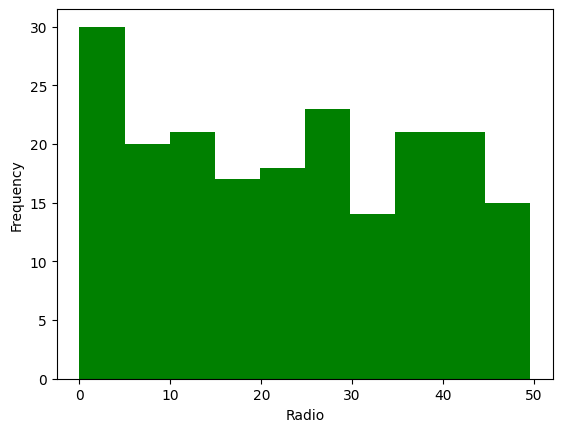

In [9]:
advertising['Radio'].plot.hist(bins=10, color="green", xlabel="Radio")

<Axes: xlabel='newspaper', ylabel='Frequency'>

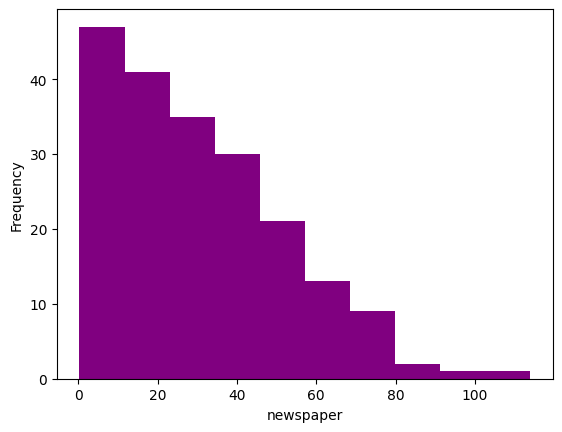

In [10]:
advertising['Newspaper'].plot.hist(bins=10,color="purple", xlabel="newspaper")

Histogram Observation

The majority sales is the result of two advertising cost in newspaper

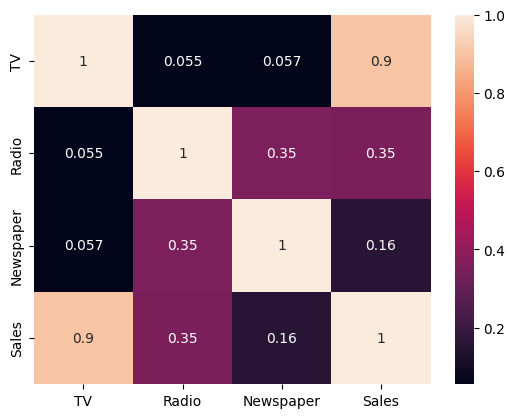

In [11]:
sns.heatmap(advertising.corr(),annot = True)
plt.show()

SALES IS HIGHLY COORELATED WITH TV

Lets train our model using linear regression as it is coorelated with only variable TV

Model Building

In [12]:
X = advertising['TV']
y = advertising['Sales']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(advertising[['TV']], advertising[['Sales']], test_size = 0.3,random_state=0)

In [17]:
print(X_train)

        TV
131  265.2
96   197.6
181  218.5
19   147.3
153  171.3
..     ...
67   139.3
192   17.2
117   76.4
47   239.9
172   19.6

[140 rows x 1 columns]


In [18]:
print(y_train)

     Sales
131   17.7
96    16.7
181   17.2
19    14.6
153   16.0
..     ...
67    13.4
192    5.9
117    9.4
47    23.2
172    7.6

[140 rows x 1 columns]


In [19]:
print(X_test)

        TV
18    69.2
170   50.0
107   90.4
98   289.7
177  170.2
182   56.2
5      8.7
146  240.1
12    23.8
152  197.6
61   261.3
125   87.2
180  156.6
154  187.8
80    76.4
7    120.2
33   265.6
130    0.7
37    74.7
74   213.4
183  287.6
145  140.3
45   175.1
159  131.7
60    53.5
123  123.1
179  165.6
185  205.0
122  224.0
44    25.1
16    67.8
55   198.9
150  280.7
111  241.7
22    13.2
189   18.7
129   59.6
4    180.8
83    68.4
106   25.0
134   36.9
66    31.5
26   142.9
113  209.6
168  215.4
63   102.7
8      8.6
75    16.9
118  125.7
143  104.6
71   109.8
124  229.5
184  253.8
97   184.9
149   44.7
24    62.3
30   292.9
160  172.5
40   202.5
56     7.3


In [20]:
print(y_test)

     Sales
18    11.3
170    8.4
107   12.0
98    25.4
177   16.7
182    8.7
5      7.2
146   18.2
12     9.2
152   16.6
61    24.2
125   10.6
180   15.5
154   20.6
80    11.8
7     13.2
33    17.4
130    1.6
37    14.7
74    17.0
183   26.2
145   10.3
45    16.1
159   12.9
60     8.1
123   15.2
179   17.6
185   22.6
122   16.6
44     8.5
16    12.5
55    23.7
150   16.1
111   21.8
22     5.6
189    6.7
129    9.7
4     17.9
83    13.6
106    7.2
134   10.8
66    11.0
26    15.0
113   20.9
168   17.1
63    14.0
8      4.8
75     8.7
118   15.9
143   10.4
71    12.4
124   19.7
184   17.6
97    20.5
149   10.1
24     9.7
30    21.4
160   16.4
40    16.6
56     5.5


In [21]:
X_train = X_train.astype(int)
y_train = y_train.astype(int)
X_test = X_test.astype(int)
y_test = y_test.astype(int)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
res= model.predict(X_test)
print(res)

[[10.48631842]
 [ 9.44824717]
 [11.63366033]
 [22.50609075]
 [16.00448663]
 [ 9.77605915]
 [ 7.15356337]
 [19.82895964]
 [ 7.9730933 ]
 [17.47964051]
 [20.97630155]
 [11.46975434]
 [15.23959203]
 [16.93328722]
 [10.86876572]
 [13.27272019]
 [21.19484286]
 [ 6.71648073]
 [10.75949507]
 [18.35380577]
 [22.3968201 ]
 [14.36542677]
 [16.27766327]
 [13.87370881]
 [ 9.61215316]
 [13.43662618]
 [15.73130998]
 [17.91672314]
 [18.95479438]
 [ 8.08236395]
 [10.37704776]
 [17.53427584]
 [22.0143728 ]
 [19.88359497]
 [ 7.42674001]
 [ 7.69991665]
 [ 9.93996513]
 [16.55083992]
 [10.43168309]
 [ 8.08236395]
 [ 8.68335257]
 [ 8.41017593]
 [14.47469742]
 [18.13526445]
 [18.46307642]
 [12.28928427]
 [ 7.15356337]
 [ 7.590646  ]
 [13.54589683]
 [12.39855493]
 [12.67173157]
 [19.22797103]
 [20.53921892]
 [16.76938123]
 [ 9.1204352 ]
 [10.10387112]
 [22.66999674]
 [16.11375729]
 [17.75281715]
 [ 7.09892804]]


In [26]:
model.coef_

array([[0.05463533]])

In [27]:
model.intercept_

array([6.71648073])

In [28]:
0.05463533 * 69.2 + 0.05463533

3.8354001660000003

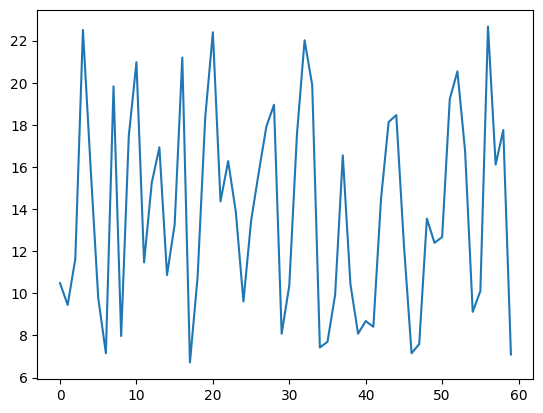

In [29]:
plt.plot(res)

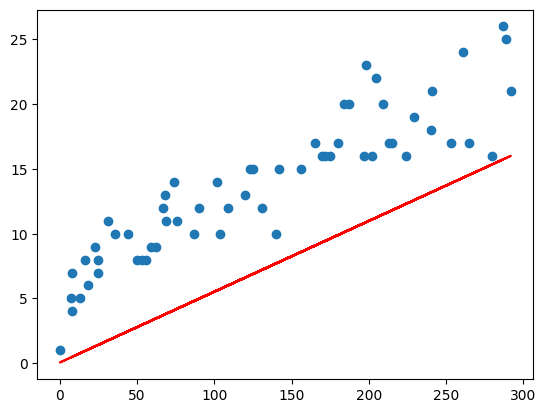

In [30]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 0.05463533 + 0.05463533 * X_test, 'r')
plt.show()

Concluding that the above mentioned solution is successfully able to predict the sales using advertising platform datasets